In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_approval.csv')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [3]:
df.isna().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
JOB                    False
BEGIN_MONTHS           False
STATUS                 False
TARGET                 False
dtype: bool

No missing data in all columns.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

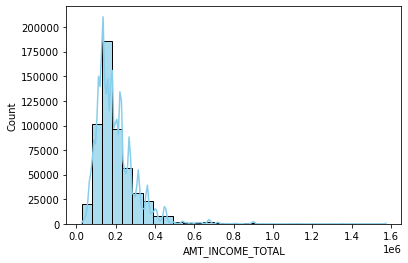

In [4]:
sns.histplot(df['AMT_INCOME_TOTAL'], bins=30, kde=True, color='skyblue', alpha=0.7)

In [5]:
df['AMT_INCOME_TOTAL'].describe()

count    5.376670e+05
mean     1.971171e+05
std      1.041390e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.295000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:>

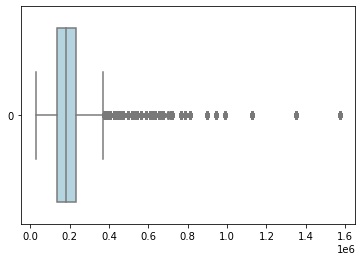

In [6]:
sns.boxplot(data=df['AMT_INCOME_TOTAL'], color='lightblue',orient="h")

The column AMT_INCOME_TOTAL shows the Annual Income of each people. There are some outliers and there is a group. But we can still try to limit the range of income to make our model more accuracy to advoid extreme values. we can also use standerdize to make it not as huge as what we see now.

In [7]:
education = df['NAME_EDUCATION_TYPE'].value_counts()
education

Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64

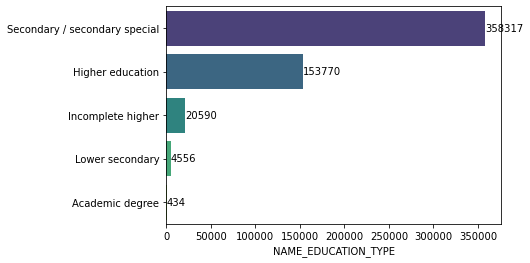

In [8]:
sns.barplot(y=education.index, x=education, palette="viridis")
for i in range(len(education)):
    plt.text(education[i] + 0.5, i, f"{education[i]}", color="black", va="center")
plt.show()


NAME_EDUCATION_TYPE shows the Education Level of each paticipants and it have five different groups in total. Most of the people were scondary degree and less people were accademic degrees. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also change it to Secondary and higher vs others to make it a binary catigory.

In [9]:
family_status = df['NAME_FAMILY_STATUS'].value_counts()

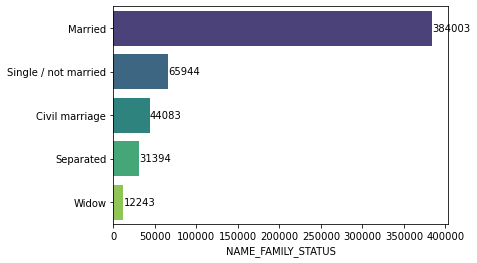

In [10]:
sns.barplot(y=family_status.index, x=family_status, palette="viridis")
for i in range(len(family_status)):
    plt.text(family_status[i] + 0.5, i, f"{family_status[i]}", color="black", va="center")
plt.show()

NAME_FAMILY_STATUS shows the Marital Status of each paticipants and it have five different groups in total. Most of the people were Married and few people were widow. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also choose one vs others to make it a binary catigory if it is necessary. In this case, since married is majority, we can also set to married and others to reduce the model complexity.

In [11]:
house_type = df['NAME_HOUSING_TYPE'].value_counts()

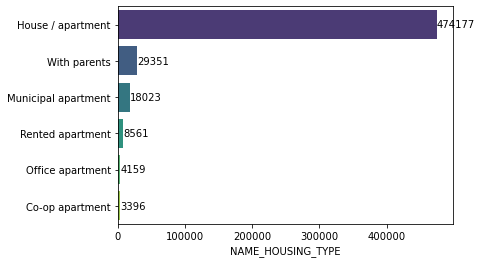

In [12]:
sns.barplot(y=house_type.index, x=house_type, palette="viridis")
for i in range(len(house_type)):
    plt.text(house_type[i] + 0.5, i, f"{house_type[i]}", color="black", va="center")
plt.show()

NAME_HOUSING_TYPE shows the Way of Living of each paticipants and it have five different groups in total. For this data, we can use label encouding {0~4} or we can also use one-hot encouding. we can also choose vs others to make it a binary catigory if it is necessary. In this case, since House / apartment is majority, we can also set to married and others to reduce the model complexity.